## LYFT CUSTOMER(DRIVER) LIFETIME VALUE ANALYSIS

### Analysis Points

##### We would like to answer some questions after exploring and analyzing the data, questions are :

##### 1. Recommend a Driver's Lifetime Value (i.e., the value of a driver to Lyft over the entire projected lifetime of a driver).
##### 2. What are the main factors that affect a driver's lifetime value?
##### 3. What is the average projected lifetime of a driver? That is, once a driver is onboarded, how long do they typically continue driving with Lyft?
##### 4. Do all drivers act alike? Are there specific segments of drivers that generate more value for Lyft than the average driver?
##### 5. What actionable recommendations are there for the business?

### Data Exploration

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#reading all datasets at once. 

driver_ids = pd.read_csv('/Users/adyashamohapatra/Desktop/Data Science Projects/Lyft_DS_driver_ids.csv')
ride_ids = pd.read_csv('/Users/adyashamohapatra/Desktop/Data Science Projects/Lyft_DS_ride_ids.csv')
ride_timestamps = pd.read_csv('/Users/adyashamohapatra/Desktop/Data Science Projects/Lyft_DS_ride_timestamps.csv')

driver_ids.head()
ride_ids.head()
ride_timestamps.head()

driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2  002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   
3  002be0ffdc997bd5c50703158b7c2491  034e861343a63ac3c18a9ceb1ce0ac69   
4  002be0ffdc997bd5c50703158b7c2491  034f2e614a2f9fc7f1c2f77647d1b981   

   ride_distance  ride_duration  ride_prime_time  
0           1811            327               50  
1           3362            809                0  
2           3282            572                0  
3          65283           3338               25  
4           4115            823              100

In [18]:
#Analysis of the dataset - driver_ids

print ('Shape of data:', driver_ids.shape)
print ('Total no. of unique driver ids is:', driver_ids['driver_id'].nunique())
print ('The unique driver ids are:', driver_ids['driver_id'].unique())

#driver onboarding date - lifetime all drivers start & end.
print('Minimum date: ',driver_ids['driver_onboard_date'].min())
print('Maximum date: ',driver_ids['driver_onboard_date'].max())



Shape of data: (937, 2)
Total no. of unique driver ids is: 937
The unique driver ids are: ['002be0ffdc997bd5c50703158b7c2491' '007f0389f9c7b03ef97098422f902e62'
 '011e5c5dfc5c2c92501b8b24d47509bc' '0152a2f305e71d26cc964f8d4411add9'
 '01674381af7edd264113d4e6ed55ecda' '01788cf817698fe68eaecd7eb18b2f72'
 '0213f8b59219e32142711992ca4ec01f' '021e5cd15ef0bb3ec20a12af99e142b3'
 '0258e250ca195cc6258cbdc75aecd853' '028b5a4dcd7f4924ebfabcf2e814c014'
 '02d6a6b8a6da15fc219a9570f7ebbe78' '02e440f6c209206375833cef02e0cbae'
 '036f3d94e7c65e4e3574822d31c72656' '039c5afbca8e03e4c18d9c8ea94140ac'
 '039da9c077e17af98ca8530e4d7975f1' '03f2b5c74cb89f39e58711699e76bf39'
 '03f5278eb43475aa6790f5be32463755' '0430df9a3eb327122c57ee3a64765000'
 '04c4ffa5a385eab86fa7e422263d2999' '04d686ef2fba281e395992a28f14fdd3'
 '052bba06c5fc0bdea4bc2f9cb92b37c7' '059ed570673c2d15ca11dd6b3a25513b'
 '05addf442c147875efa5cf53453ad47b' '05bad02e08c7f849e91dc1259da8b4ec'
 '0656192a402808805282e60761bda088' '06b1ba06e5505f8218ec8

In [26]:
#Analysis of the dataset - ride_timestamps data

ride_timestamps[.describe(include='all')

ride_id         event            timestamp
count                             970405        970405               970404
unique                            194081             5               865826
top     00003037a262d9ee40e61b5c0718f7f0  requested_at  2016-04-30 22:09:15
freq                                   5        194081                    7

In [28]:
# Some info about ride_timestamps data 

# Print shape (num. of rows, num. of columns) 
print('Shape of data: ', ride_timestamps.shape)
# Print unique count of ride id
print('unique of ride id: ', len(ride_timestamps['ride_id'].unique()))
# Print count of every value in column Event
ride_timestamps['event'].value_counts()

Shape of data:  (970405, 3)
unique of ride id:  194081


event
requested_at      194081
accepted_at       194081
arrived_at        194081
picked_up_at      194081
dropped_off_at    194081
Name: count, dtype: int64

In [30]:
# print sample of ride_ids data 
ride_ids.sample(2)

driver_id                           ride_id  \
16842   190abbe65af2b77794e0a6beb37cc613  e8c07c5aeb6ba5aa8801af0cbc3674a6   
177069  e61357801b8cc7a4b40cf736e6890972  cfd4f67826ae951e02775f514eb53119   

        ride_distance  ride_duration  ride_prime_time  
16842            3184            503                0  
177069           2616            412                0

In [32]:
# Some info about ride_ids data 

# Print shape (num. of rows, num. of columns) 
print('Shape of data: ', ride_ids.shape)
# Print count unique values of driver id
print('unique of driver id: ', len(ride_ids['driver_id'].unique()))
# Print count unique values of ride id
print('unique of ride id: ', len(ride_ids['ride_id'].unique()))
# Description of numeric columns (ride_distance, ride_duration, ride_prime_time)
ride_ids.describe()

Shape of data:  (193502, 5)
unique of driver id:  937
unique of ride id:  193502


ride_distance  ride_duration  ride_prime_time
count  193502.000000  193502.000000    193502.000000
mean     6955.218266     858.966099        17.305893
std      8929.444606     571.375818        30.825800
min        -2.000000       2.000000         0.000000
25%      2459.000000     491.000000         0.000000
50%      4015.000000     727.000000         0.000000
75%      7193.000000    1069.000000        25.000000
max    724679.000000   28204.000000       500.000000

### Data Engineering

### Ride Fare Calculation Formula

We compute the total ride cost using the following formula:

```
Total Fare = (Base Fare 
              + (Cost per Mile × Ride Distance) 
              + (Cost per Minute × Ride Duration)) 
             × (1 + Prime Time Rate / 100) 
             + Service Fee
```

Where:

- **Base Fare** = \$2.00  
- **Cost per Mile** = \$1.15  
- **Cost per Minute** = \$0.22  
- **Service Fee** = \$1.75  
- **Minimum Fare** = \$5.00  
- **Maximum Fare** = \$400.00  
- **Prime Time Rate** = surge multiplier percentage (e.g., 50 means 50% increase)

> 💡 *We also cap the final fare between the minimum and maximum allowed fare.*



In [42]:
BASEFARE = 2.00
COSTPERMILE = 1.15
COSTPERMIN = 0.22
SERVICEFEE = 1.75
MINFARE = 5.00
MAXFARE = 400.00

# calc. total life time of ride (convert ride_distance from meters to miles, convert ride_duration from seconds to minutes)
ride_ids['ride_total_cost'] = ( (BASEFARE + (COSTPERMIN*(ride_ids['ride_duration']/60)) + (COSTPERMILE*(ride_ids['ride_distance']*0.000621))) * (1 + ride_ids['ride_prime_time']/100) ) + SERVICEFEE

# Apply lower and upper bound to ride cost (Minimum Fare, Maximum Fare )

ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] < MINFARE, MINFARE, ride_ids['ride_total_cost'])
ride_ids['ride_total_cost'] = np.where(ride_ids['ride_total_cost'] > MAXFARE, MAXFARE, ride_ids['ride_total_cost'])

#check
ride_ids.head(11)

driver_id                           ride_id  \
0   002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1   002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2   002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   
3   002be0ffdc997bd5c50703158b7c2491  034e861343a63ac3c18a9ceb1ce0ac69   
4   002be0ffdc997bd5c50703158b7c2491  034f2e614a2f9fc7f1c2f77647d1b981   
5   002be0ffdc997bd5c50703158b7c2491  03d6b9d80b8a96135cb9b25178e9e203   
6   002be0ffdc997bd5c50703158b7c2491  04053c0ed21761e07f0b869cab5b7dd0   
7   002be0ffdc997bd5c50703158b7c2491  0534d432e0186625f623aaee57af98be   
8   002be0ffdc997bd5c50703158b7c2491  053a1621c0affcd2b9c517af5c2bc843   
9   002be0ffdc997bd5c50703158b7c2491  066e92c52f59486de56cd7b8716a4ca6   
10  002be0ffdc997bd5c50703158b7c2491  07d400d669489e627818e46dc097858a   

    ride_distance  ride_duration  ride_prime_time  ride_total_cost  
0            1811            327               50         8.488488  
1            3362            809                0         9.117306  
2            3282            572                0         8.191174  
3           65283           3338               25        77.826485  
4            4115            823              100        17.662788  
5            4832            917              100        19.376212  
6            1575            347                0         6.147120  
7            3056            687               25        10.126803  
8            3940           1143               75        17.508314  
9            3957            868               50        13.762837  
10           3534            925              100        17.580946

### Create Features of the Rides

In [45]:
#PIVOT the ride events 

ride_events = ride_timestamps.pivot(index='ride_id', columns = 'event' , values = 'timestamp')
ride_events.head(2)

event                                     accepted_at           arrived_at  \
ride_id                                                                      
00003037a262d9ee40e61b5c0718f7f0  2016-06-13 09:39:51  2016-06-13 09:44:31   
00005eae40882760d675da5effb89ae3  2016-05-14 05:23:25  2016-05-14 05:26:17   

event                                  dropped_off_at         picked_up_at  \
ride_id                                                                      
00003037a262d9ee40e61b5c0718f7f0  2016-06-13 10:03:05  2016-06-13 09:44:33   
00005eae40882760d675da5effb89ae3  2016-05-14 05:34:17  2016-05-14 05:26:18   

event                                    requested_at  
ride_id                                                
00003037a262d9ee40e61b5c0718f7f0  2016-06-13 09:39:19  
00005eae40882760d675da5effb89ae3  2016-05-14 05:23:21

In [47]:
#merge ride_ids with ride_events on ride_id
ride_data = pd.merge(ride_ids, ride_events, on= 'ride_id')
print ('Shape of the merged Ride Data is :', ride_data.shape)
ride_data.head(2)

Shape of the merged Ride Data is : (184819, 11)


driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   

   ride_distance  ride_duration  ride_prime_time  ride_total_cost  \
0           1811            327               50         8.488488   
1           3362            809                0         9.117306   

           accepted_at           arrived_at       dropped_off_at  \
0  2016-04-23 02:14:15  2016-04-23 02:16:36  2016-04-23 02:22:07   
1  2016-03-29 19:00:52  2016-03-29 19:03:57  2016-03-29 19:17:30   

          picked_up_at         requested_at  
0  2016-04-23 02:16:40  2016-04-23 02:13:50  
1  2016-03-29 19:04:01  2016-03-29 19:00:49

In [51]:
# Info about ride_data
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184819 entries, 0 to 184818
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   driver_id        184819 non-null  object 
 1   ride_id          184819 non-null  object 
 2   ride_distance    184819 non-null  int64  
 3   ride_duration    184819 non-null  int64  
 4   ride_prime_time  184819 non-null  int64  
 5   ride_total_cost  184819 non-null  float64
 6   accepted_at      184819 non-null  object 
 7   arrived_at       184818 non-null  object 
 8   dropped_off_at   184819 non-null  object 
 9   picked_up_at     184819 non-null  object 
 10  requested_at     184819 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 15.5+ MB


### Data Pre Processing (Basic df housekeeping)

In [54]:
# convert ride distance from meters to kilometers
ride_data["ride_distance"] = ride_data["ride_distance"]/1000
# convert ride duration from seconds to minutes 
ride_data["ride_duration"] = ride_data["ride_duration"]/60


# CREATE some Features for TIME
# It is the time a driver takes to accept a ride once it is requested in minutes.
ride_data['ride_accept_response_time'] = (pd.to_datetime(ride_data['accepted_at']) - pd.to_datetime(ride_data['requested_at'])).astype('timedelta64[s]')/60
# It is the time a driver takes to reach the pickup location once a ride is accepted in minutes.
ride_data['ride_arrival_time'] = (pd.to_datetime(ride_data['arrived_at']) - pd.to_datetime(ride_data['accepted_at'])).astype('timedelta64[s]')/60
# It is the time a driver waits for the rider once the driver reaches the pickup location in minutes.
ride_data['ride_wait_time'] = (pd.to_datetime(ride_data['picked_up_at']) - pd.to_datetime(ride_data['arrived_at'])).astype('timedelta64[s]')/60

# CREATE some Features for DISTANCE - Labels 
# divide ride distance to 3 categories (Short ride, medium ride, long ride) dependant on ride_distance column (KM)
q33 = ride_data['ride_distance'].quantile(0.33)
q66 = ride_data['ride_distance'].quantile(0.66)

ride_data['ride_length'] = np.select(
    [
        ride_data['ride_distance'] <= q33,
        (ride_data['ride_distance'] > q33) & (ride_data['ride_distance'] <= q66),
        ride_data['ride_distance'] > q66
    ],
    ['short_ride', 'med_ride', 'long_ride']
)

# divide ride time to 3 categories (Morning ride, evening ride, night ride) dependant on accepted_at column (time)
ride_data["ride_time"] = np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour > 6, (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 15, "morning_ride", (np.where(pd.to_datetime(ride_data['accepted_at']).dt.hour <= 21, "evening_ride", "night_ride")))), "night_ride")
# Convert accepted_at column to date
ride_data['ride_date'] = pd.to_datetime(ride_data['accepted_at']).dt.date
# Print first 3 rows in ride data
ride_data.head(3)

driver_id                           ride_id  \
0  002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1  002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2  002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   

   ride_distance  ride_duration  ride_prime_time  ride_total_cost  \
0          1.811       5.450000               50         8.488488   
1          3.362      13.483333                0         9.117306   
2          3.282       9.533333                0         8.191174   

           accepted_at           arrived_at       dropped_off_at  \
0  2016-04-23 02:14:15  2016-04-23 02:16:36  2016-04-23 02:22:07   
1  2016-03-29 19:00:52  2016-03-29 19:03:57  2016-03-29 19:17:30   
2  2016-06-21 11:56:39  2016-06-21 12:01:32  2016-06-21 12:11:07   

          picked_up_at         requested_at ride_accept_response_time  \
0  2016-04-23 02:16:40  2016-04-23 02:13:50                    0 days   
1  2016-03-29 19:04:01  2016-03-29 19:00:49                    0 days   
2  2016-06-21 12:01:35  2016-06-21 11:56:31                    0 days   

  ride_arrival_time ride_wait_time ride_length     ride_time   ride_date  
0   0 days 00:00:02         0 days  short_ride    night_ride  2016-04-23  
1   0 days 00:00:03         0 days    med_ride  evening_ride  2016-03-29  
2   0 days 00:00:04         0 days    med_ride  morning_ride  2016-06-21

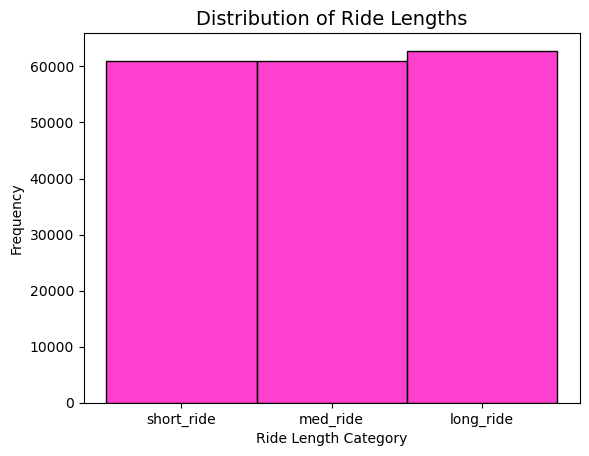

In [59]:
# histogram of ride length categories
sns.histplot(ride_data['ride_length'],color='#FF00BF')
plt.title("Distribution of Ride Lengths", fontsize=14)
plt.xlabel("Ride Length Category")
plt.ylabel("Frequency")
plt.show()


### Create Features of the Drivers

In [62]:
# calculate driver_perday_ridecount
#driver_perday_ridecount = ride_data.pivot_table(index = 'driver_id', columns = 'ride_date', aggfunc='size').fillna(0)
driver_perday_ridecount = ride_data.groupby(['driver_id','ride_date']).size().unstack(fill_value=0).fillna(0)
driver_perday_ridecount.head(3)

ride_date                         2016-03-28  2016-03-29  2016-03-30  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491           0           6           0   
007f0389f9c7b03ef97098422f902e62           0           1           0   
011e5c5dfc5c2c92501b8b24d47509bc           0           0           0   

ride_date                         2016-03-31  2016-04-01  2016-04-02  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491           8           7           5   
007f0389f9c7b03ef97098422f902e62           0           0           0   
011e5c5dfc5c2c92501b8b24d47509bc           0           0           0   

ride_date                         2016-04-03  2016-04-04  2016-04-05  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491           0           0           7   
007f0389f9c7b03ef97098422f902e62           0           0           0   
011e5c5dfc5c2c92501b8b24d47509bc           0           0           2   

ride_date                         2016-04-06  ...  2016-06-17  2016-06-18  \
driver_id                                     ...                           
002be0ffdc997bd5c50703158b7c2491           0  ...           1           3   
007f0389f9c7b03ef97098422f902e62           0  ...           0           0   
011e5c5dfc5c2c92501b8b24d47509bc           3  ...           0           0   

ride_date                         2016-06-19  2016-06-20  2016-06-21  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491           0           2           9   
007f0389f9c7b03ef97098422f902e62           0           0           0   
011e5c5dfc5c2c92501b8b24d47509bc           0           0           0   

ride_date                         2016-06-22  2016-06-23  2016-06-24  \
driver_id                                                              
002be0ffdc997bd5c50703158b7c2491           3           5           0   
007f0389f9c7b03ef97098422f902e62           2           0           0   
011e5c5dfc5c2c92501b8b24d47509bc           0           0           0   

ride_date                         2016-06-25  2016-06-26  
driver_id                                                 
002be0ffdc997bd5c50703158b7c2491           0           0  
007f0389f9c7b03ef97098422f902e62           0           0  
011e5c5dfc5c2c92501b8b24d47509bc           0           0  

[3 rows x 91 columns]

In [187]:
driver_info = pd.DataFrame()
# Calc. driver total ride count
driver_info['total_ride_count'] = ride_data.pivot_table(index=['driver_id'], aggfunc='size')

# Calc. driver total ride distance
driver_info['total_distance'] = ride_ids.groupby('driver_id')['ride_distance'].sum()
# Calc. driver total ride duration
driver_info['total_duration']  = ride_ids.groupby('driver_id')['ride_duration'].sum()
# Calc. driver lifetime value (total revenue)
driver_info['lifetime_value'] = ride_ids.groupby('driver_id')['ride_total_cost'].sum()

#Calc. mean driver count ride per day
driver_info['perday_ridecount_mean'] = driver_perday_ridecount.mean(axis=1)

# Calc. mean of ride accept responce time for every driver
driver_info['accept_response_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_accept_response_time': 'mean'})).iloc[:,0]
# Calc. mean of ride arrival time for every driver
driver_info['arrival_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_arrival_time': 'mean'})).iloc[:,0]
# Calc. mean of ride wait time for every driver
driver_info['wait_time_mean'] = (ride_data.groupby(ride_data['driver_id']).aggregate({'ride_wait_time': 'mean'})).iloc[:,0]
# count total no. of short/medium/long evening rides
driver_info = pd.merge(driver_info, ride_data.pivot_table(index = 'driver_id', columns = 'ride_length', aggfunc='size') ,on='driver_id')
# count total no. of day/night/night evening rides
driver_info = pd.merge(driver_info, ride_data.pivot_table(index = 'driver_id', columns = 'ride_time', aggfunc='size') ,on='driver_id')


# Convert string to float first (safely)
ride_data['ride_accept_response_time'] = pd.to_numeric(ride_data['ride_accept_response_time'], errors='coerce')

# fill nan value with 0
driver_info = driver_info.fillna(0).reset_index()
driver_info.head(5)








driver_id  total_ride_count  total_distance  \
0  002be0ffdc997bd5c50703158b7c2491               277         1740287   
1  007f0389f9c7b03ef97098422f902e62                31          117531   
2  011e5c5dfc5c2c92501b8b24d47509bc                34          269653   
3  0152a2f305e71d26cc964f8d4411add9               191         1471239   
4  01674381af7edd264113d4e6ed55ecda               375         3123644   

   total_duration  lifetime_value  perday_ridecount_mean  \
0          221238     3560.056648               3.043956   
1           20497      321.434698               0.340659   
2           29205      482.299206               0.373626   
3          174521     2610.189071               2.098901   
4          357443     5379.644866               4.120879   

   accept_response_time_mean arrival_time_mean wait_time_mean  long_ride  \
0                   0.025271   0 days 00:00:02         0 days         79   
1                   0.032258   0 days 00:00:02         0 days          5   
2                   0.000000   0 days 00:00:03         0 days         11   
3                   0.062827   0 days 00:00:03         0 days         99   
4                   0.082667   0 days 00:00:03         0 days        157   

   med_ride  short_ride  evening_ride  morning_ride  night_ride  
0       103          95         103.0          85.0        89.0  
1        15          11          24.0           6.0         1.0  
2        11          12          24.0           8.0         2.0  
3        51          41          17.0          67.0       107.0  
4       111         107           0.0         350.0        25.0

In [189]:
# Calc how long do the driver typically continue driving with Lyft
onboard_data = pd.merge(ride_data.groupby('driver_id').agg({'accepted_at': max}), driver_ids , on='driver_id')
# Calc. driver_duration the long of how driver continue driving with lyft par days
#onboard_data['driver_duration'] = (pd.to_datetime(onboard_data['accepted_at']) - pd.to_datetime(onboard_data['driver_onboard_date'])).astype('timedelta64[s]')
onboard_data['driver_duration'] = (
    pd.to_datetime(onboard_data['accepted_at']) - pd.to_datetime(onboard_data['driver_onboard_date'])
).dt.total_seconds() / (24 * 60 * 60)
onboard_data['driver_duration'] = onboard_data['driver_duration'].astype(int)
onboard_data = onboard_data[['driver_id', 'driver_duration']]
onboard_data

driver_id  driver_duration
0    002be0ffdc997bd5c50703158b7c2491               86
1    007f0389f9c7b03ef97098422f902e62               85
2    011e5c5dfc5c2c92501b8b24d47509bc               68
3    0152a2f305e71d26cc964f8d4411add9               64
4    01674381af7edd264113d4e6ed55ecda               56
..                                ...              ...
832  ff419a3476e21e269e340b5f1f05414e               61
833  ff714a67ba8c6a108261cd81e3b77f3a               81
834  fff482c704d36a1afe8b8978d5486283               34
835  fffecccc49436c5389075b13209f0dfa               51
836  ffff51a71f2f185ec5e97d59dbcd7a78               53

[837 rows x 2 columns]

In [191]:
driver_info = pd.merge(driver_info, onboard_data, on= 'driver_id' , how='inner')
driver_info

driver_id  total_ride_count  total_distance  \
0    002be0ffdc997bd5c50703158b7c2491               277         1740287   
1    007f0389f9c7b03ef97098422f902e62                31          117531   
2    011e5c5dfc5c2c92501b8b24d47509bc                34          269653   
3    0152a2f305e71d26cc964f8d4411add9               191         1471239   
4    01674381af7edd264113d4e6ed55ecda               375         3123644   
..                                ...               ...             ...   
832  ff419a3476e21e269e340b5f1f05414e               242         2002400   
833  ff714a67ba8c6a108261cd81e3b77f3a               485         2834765   
834  fff482c704d36a1afe8b8978d5486283                35          174394   
835  fffecccc49436c5389075b13209f0dfa               406         2924913   
836  ffff51a71f2f185ec5e97d59dbcd7a78               330         2372018   

     total_duration  lifetime_value  perday_ridecount_mean  \
0            221238     3560.056648               3.043956   
1             20497      321.434698               0.340659   
2             29205      482.299206               0.373626   
3            174521     2610.189071               2.098901   
4            357443     5379.644866               4.120879   
..              ...             ...                    ...   
832          246308     3537.441127               2.659341   
833          442492     6285.948397               5.329670   
834           27693      380.579655               0.384615   
835          353974     6050.600054               4.461538   
836          268641     4579.933147               3.626374   

     accept_response_time_mean arrival_time_mean wait_time_mean  long_ride  \
0                     0.025271   0 days 00:00:02         0 days         79   
1                     0.032258   0 days 00:00:02         0 days          5   
2                     0.000000   0 days 00:00:03         0 days         11   
3                     0.062827   0 days 00:00:03         0 days         99   
4                     0.082667   0 days 00:00:03         0 days        157   
..                         ...               ...            ...        ...   
832                   0.016529   0 days 00:00:04         0 days         98   
833                   0.030928   0 days 00:00:02         0 days        161   
834                   0.085714   0 days 00:00:03         0 days         11   
835                   0.029557   0 days 00:00:03         0 days        137   
836                   0.051515   0 days 00:00:04         0 days        121   

     med_ride  short_ride  evening_ride  morning_ride  night_ride  \
0         103          95         103.0          85.0        89.0   
1          15          11          24.0           6.0         1.0   
2          11          12          24.0           8.0         2.0   
3          51          41          17.0          67.0       107.0   
4         111         107           0.0         350.0        25.0   
..        ...         ...           ...           ...         ...   
832        56          88          56.0         161.0        25.0   
833       155         169         164.0         308.0        13.0   
834         7          17           1.0          34.0         0.0   
835       141         128         135.0         153.0       118.0   
836       119          90          73.0          49.0       208.0   

     driver_duration  
0                 86  
1                 85  
2                 68  
3                 64  
4                 56  
..               ...  
832               61  
833               81  
834               34  
835               51  
836               53  

[837 rows x 16 columns]

### Exploratory Data Analysis

In [194]:
# Get description of data 
driver_info.describe()

total_ride_count  total_distance  total_duration  lifetime_value  \
count        837.000000    8.370000e+02      837.000000      837.000000   
mean         220.082437    1.528516e+06   189242.789725     2979.103812   
std          178.180347    1.259931e+06   154009.144305     2416.298144   
min            3.000000    9.895000e+03     1712.000000       25.687087   
25%           44.000000    3.390140e+05    38363.000000      618.060833   
50%          224.000000    1.451389e+06   189906.000000     2958.450547   
75%          330.000000    2.311846e+06   288097.000000     4475.228280   
max          919.000000    6.628201e+06   779797.000000    12347.102999   

       perday_ridecount_mean  accept_response_time_mean arrival_time_mean  \
count             837.000000                 837.000000               837   
mean                2.418488                   0.044661   0 days 00:00:03   
std                 1.958026                   0.055872   0 days 00:00:01   
min                 0.032967                   0.000000   0 days 00:00:01   
25%                 0.483516                   0.011038   0 days 00:00:02   
50%                 2.461538                   0.030303   0 days 00:00:03   
75%                 3.626374                   0.056872   0 days 00:00:04   
max                10.098901                   0.517857   0 days 00:00:11   

          wait_time_mean   long_ride    med_ride  short_ride  evening_ride  \
count                837  837.000000  837.000000  837.000000    837.000000   
mean     0 days 00:00:00   74.855436   72.589008   72.637993     84.874552   
std      0 days 00:00:00   60.870809   60.834160   62.422290     81.688592   
min    -1 days +23:59:59    1.000000    1.000000    1.000000      0.000000   
25%      0 days 00:00:00   18.000000   14.000000   14.000000     17.000000   
50%      0 days 00:00:00   71.000000   72.000000   72.000000     60.000000   
75%      0 days 00:00:00  114.000000  111.000000  112.000000    140.000000   
max      0 days 00:00:00  335.000000  294.000000  313.000000    404.000000   

       morning_ride  night_ride  driver_duration  
count    837.000000  837.000000       837.000000  
mean      85.178017   50.029869        55.075269  
std       92.089711   64.935745        21.721934  
min        0.000000    0.000000         1.000000  
25%       15.000000    5.000000        42.000000  
50%       44.000000   22.000000        57.000000  
75%      139.000000   74.000000        73.000000  
max      515.000000  470.000000        90.000000

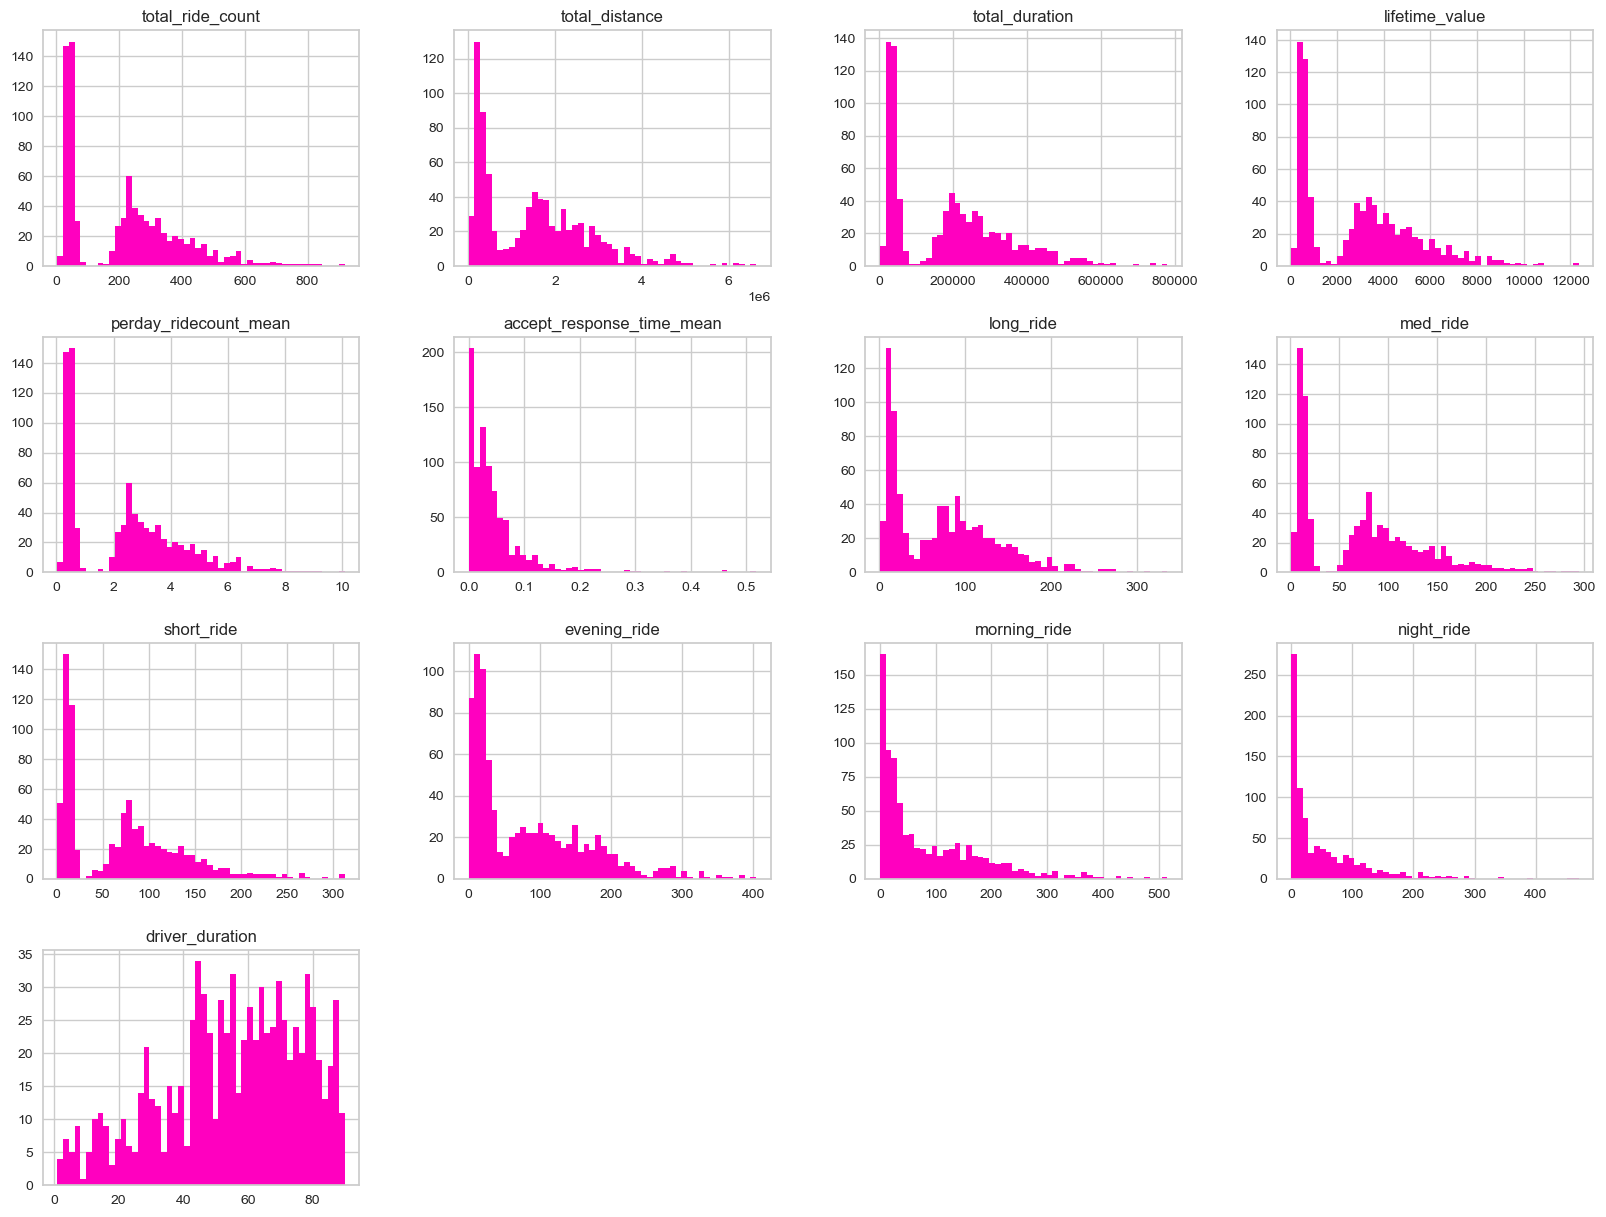

In [196]:
# Plot Histgrams of data 
driver_info.hist(bins=50, figsize=(20,15), color = '#FF00BF')
plt.show()

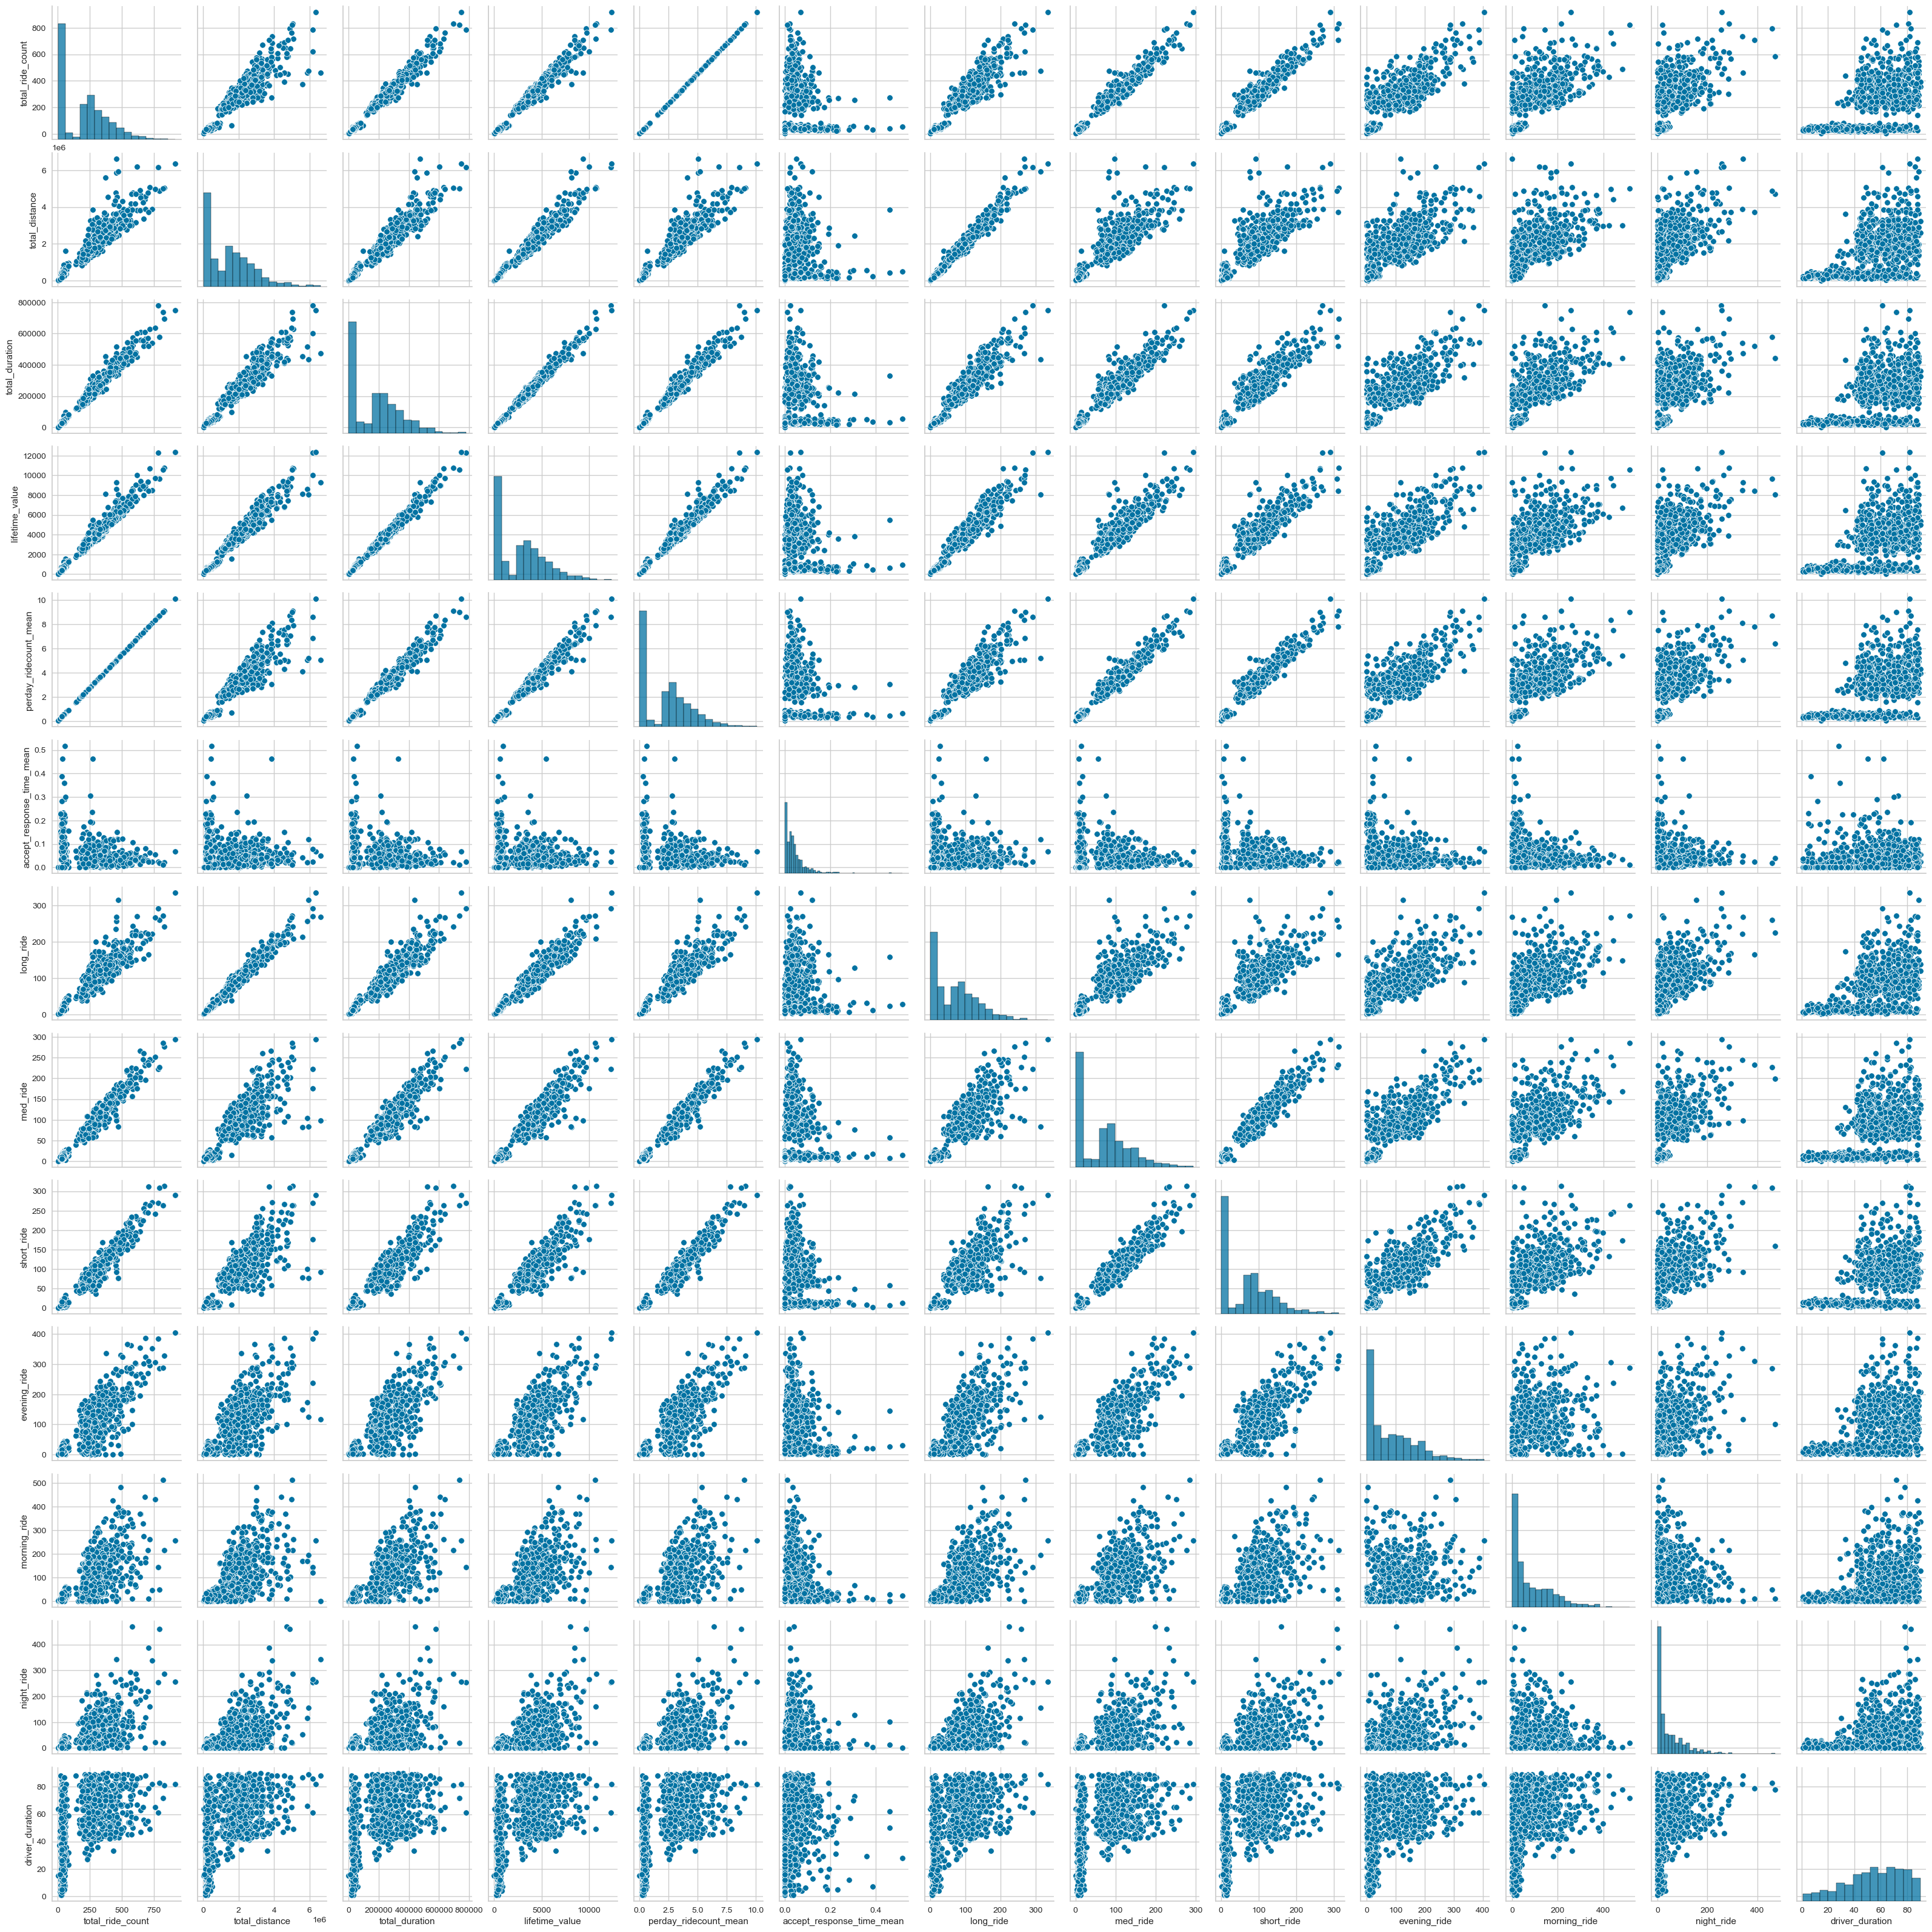

In [198]:
# scatter plots of data 
sns.pairplot(driver_info)

### Main Factors Affecting a Driver's Lifetime Value

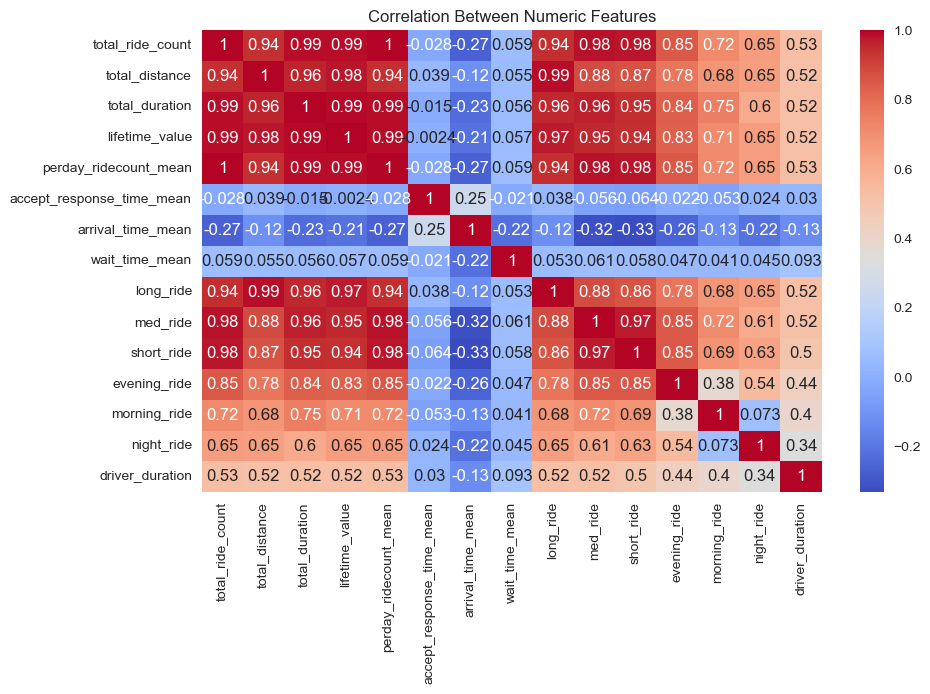

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only include numeric columns
numeric_df = driver_info.select_dtypes(include='number')

lyft_pink_palette = sns.color_palette(["#ffffff", "#FF00BF", "#52006A"])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap= 'coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


<Axes: >

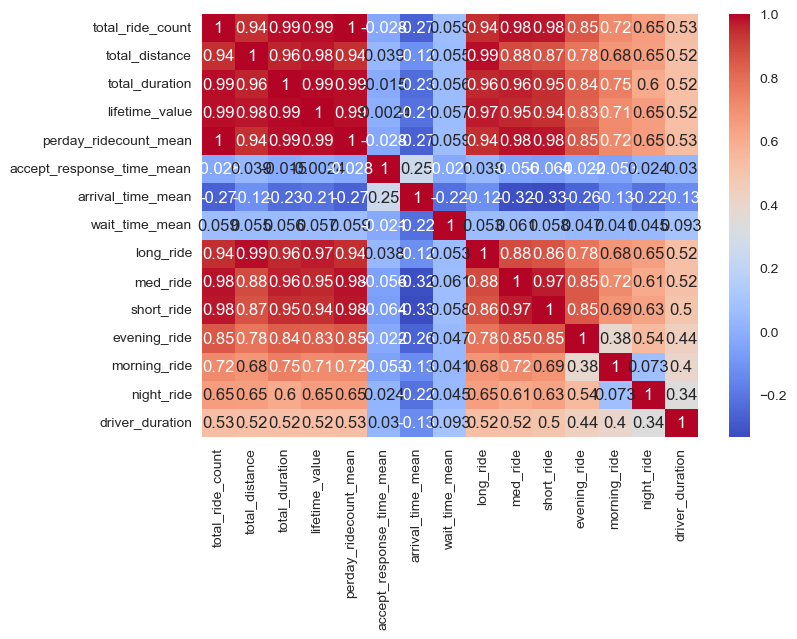

In [201]:
# Remove columns with all NaNs or constant values
numeric_df = driver_info.select_dtypes(include='number')
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]  # keep columns with >1 unique value
numeric_df = numeric_df.dropna(axis=1, how='all')         # drop columns with all NaNs

# Then plot
sns.heatmap(numeric_df.corr(), annot=True, cmap= 'coolwarm')


In [205]:
# Only use numeric columns
numeric_df = driver_info.select_dtypes(include='number')

# Get correlations with 'lifetime_value', sort them in descending order
cor_with_ltv = numeric_df.corr()['lifetime_value'].sort_values(ascending=False).iloc[1:]
pd.DataFrame(cor_with_ltv)


lifetime_value
total_duration                   0.994194
total_ride_count                 0.987069
perday_ridecount_mean            0.987069
total_distance                   0.978453
long_ride                        0.971452
med_ride                         0.954191
short_ride                       0.940301
evening_ride                     0.833416
morning_ride                     0.710687
night_ride                       0.652164
driver_duration                  0.523453
wait_time_mean                   0.057440
accept_response_time_mean       -0.002361
arrival_time_mean               -0.213454

### Average Projected Lifetime of a Driver

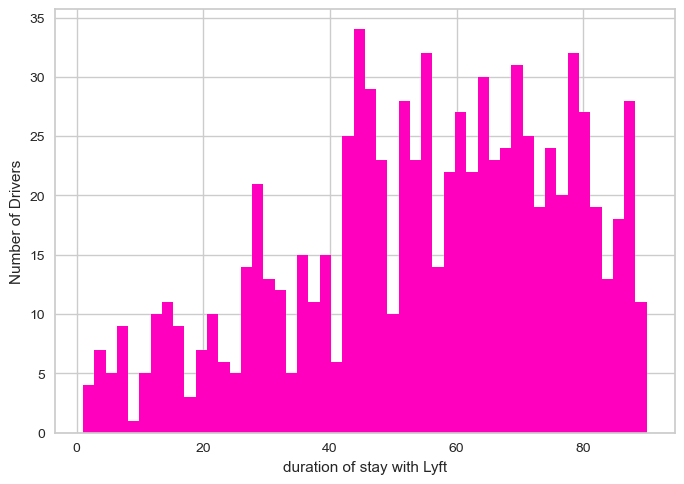

In [208]:

driver_info['driver_duration'].plot.hist(bins=50, color='#FF00BF')

plt.xlabel('duration of stay with Lyft')
plt.ylabel('Number of Drivers')
plt.show()

In [210]:
driver_info['driver_duration'].describe()

count    837.000000
mean      55.075269
std       21.721934
min        1.000000
25%       42.000000
50%       57.000000
75%       73.000000
max       90.000000
Name: driver_duration, dtype: float64

##### After seeing these results we can say the average projected lifetime of a driver is around 55 days.

### Do All Drivers Act Alike? - Clustering Exercise

In [216]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=32)
visualizer = KElbowVisualizer(model, k=(2,12))

# Just make sure all columns are numeric:
X = driver_info.select_dtypes(include='number').dropna()

visualizer.fit(X)
visualizer.show()


DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [218]:
driver_info.dtypes[driver_info.dtypes == 'timedelta64[ns]']


Series([], dtype: object)

In [220]:
driver_info.dtypes.value_counts()


int64             7
float64           6
timedelta64[s]    2
object            1
Name: count, dtype: int64

In [224]:
driver_info.select_dtypes(include='timedelta64').columns


Index(['arrival_time_mean', 'wait_time_mean'], dtype='object')

In [226]:
driver_info.select_dtypes(include='object').columns

Index(['driver_id'], dtype='object')

In [228]:
driver_info['arrival_time_mean'] = driver_info['arrival_time_mean'].dt.total_seconds() / 60
driver_info['wait_time_mean'] = driver_info['wait_time_mean'].dt.total_seconds() / 60


In [230]:
driver_info_km = driver_info.drop(columns=['driver_id'])


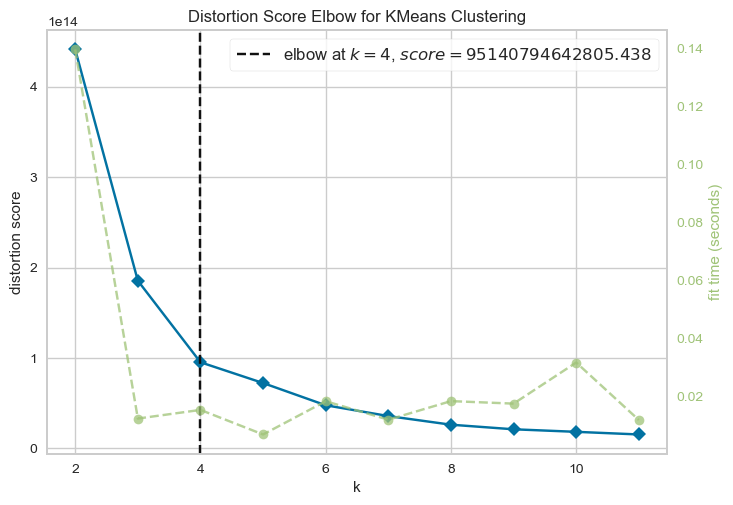

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [232]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Use the KElbowVisualizer to determine the optimal number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(driver_info_km)
visualizer.show()

In [234]:
# Fit a K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
kmeans.fit(driver_info_km)

KMeans(n_clusters=4, random_state=42)

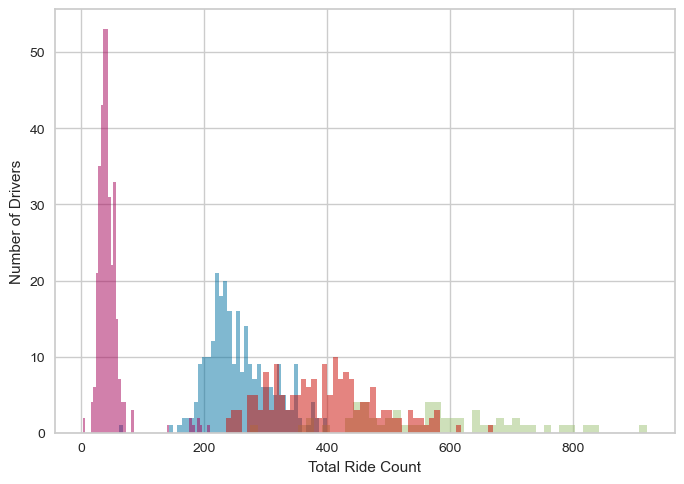

In [236]:
# Add the cluster labels to the dataframe
driver_info['cluster'] = kmeans.labels_

# Plot the distribution of total ride count by cluster
driver_info.groupby('cluster')['total_ride_count'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Total Ride Count')
plt.ylabel('Number of Drivers')
plt.show()

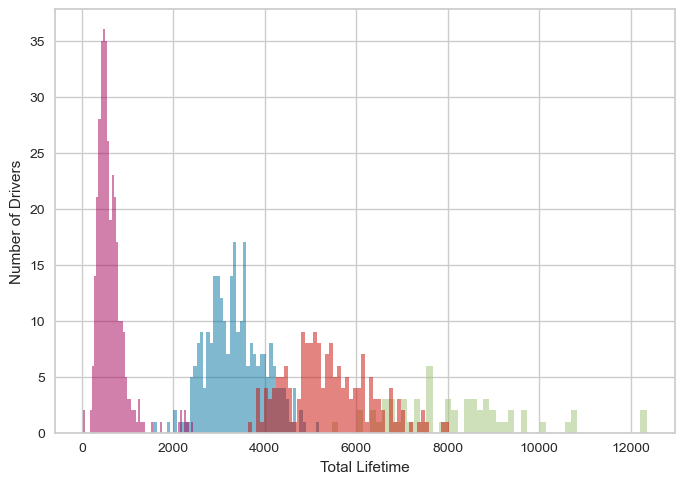

In [238]:
# Plot the distribution of total earnings by cluster
driver_info.groupby('cluster')['lifetime_value'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Total Lifetime')
plt.ylabel('Number of Drivers')
plt.show()

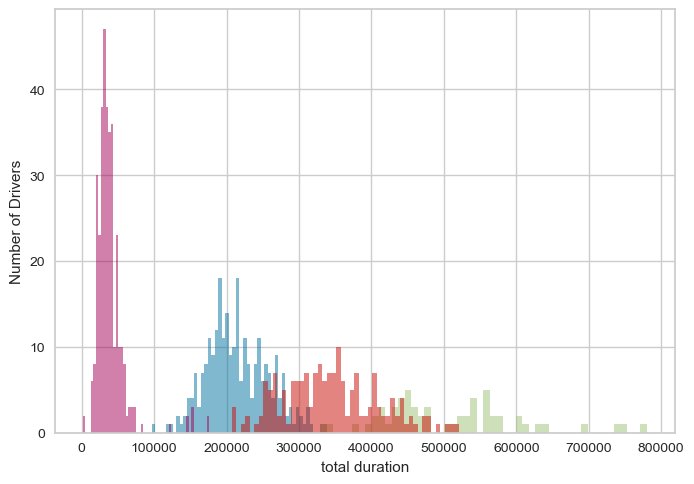

In [240]:
# Plot the distribution of total duration by cluster
driver_info.groupby('cluster')['total_duration'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total duration')
plt.ylabel('Number of Drivers')
plt.show()

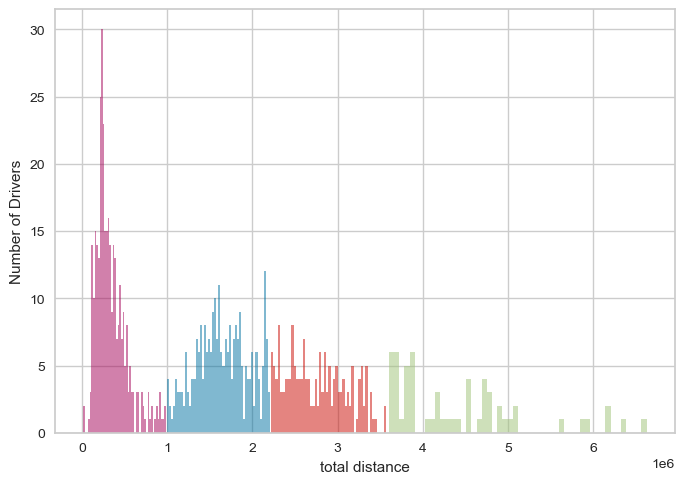

In [242]:
# Plot the distribution of total distance by cluster
driver_info.groupby('cluster')['total_distance'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total distance')
plt.ylabel('Number of Drivers')
plt.show()

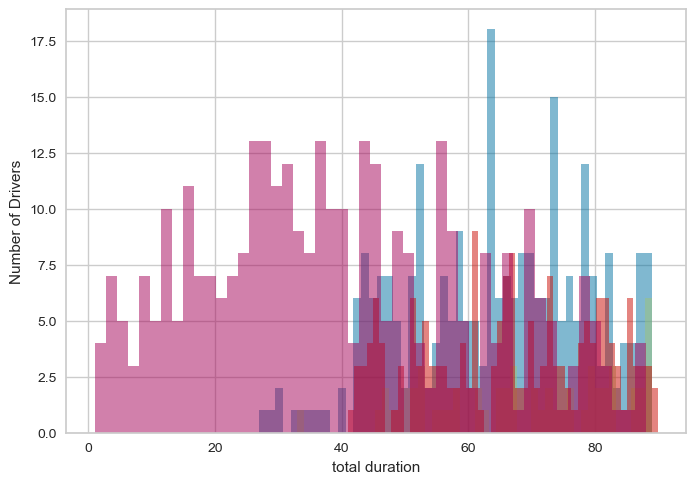

In [246]:
# Plot the distribution of driver's lifetime by cluster
driver_info.groupby('cluster')['driver_duration'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('total duration')
plt.ylabel('Number of Drivers')
plt.show()

In [250]:
grouped_df = driver_info.groupby('cluster')[['lifetime_value','med_ride', 'perday_ridecount_mean', 'total_ride_count', 'short_ride',
       'total_duration', 'total_distance', 'long_ride', 'evening_ride',
       'night_ride', 'morning_ride', 'driver_duration', 'wait_time_mean']].agg('mean')

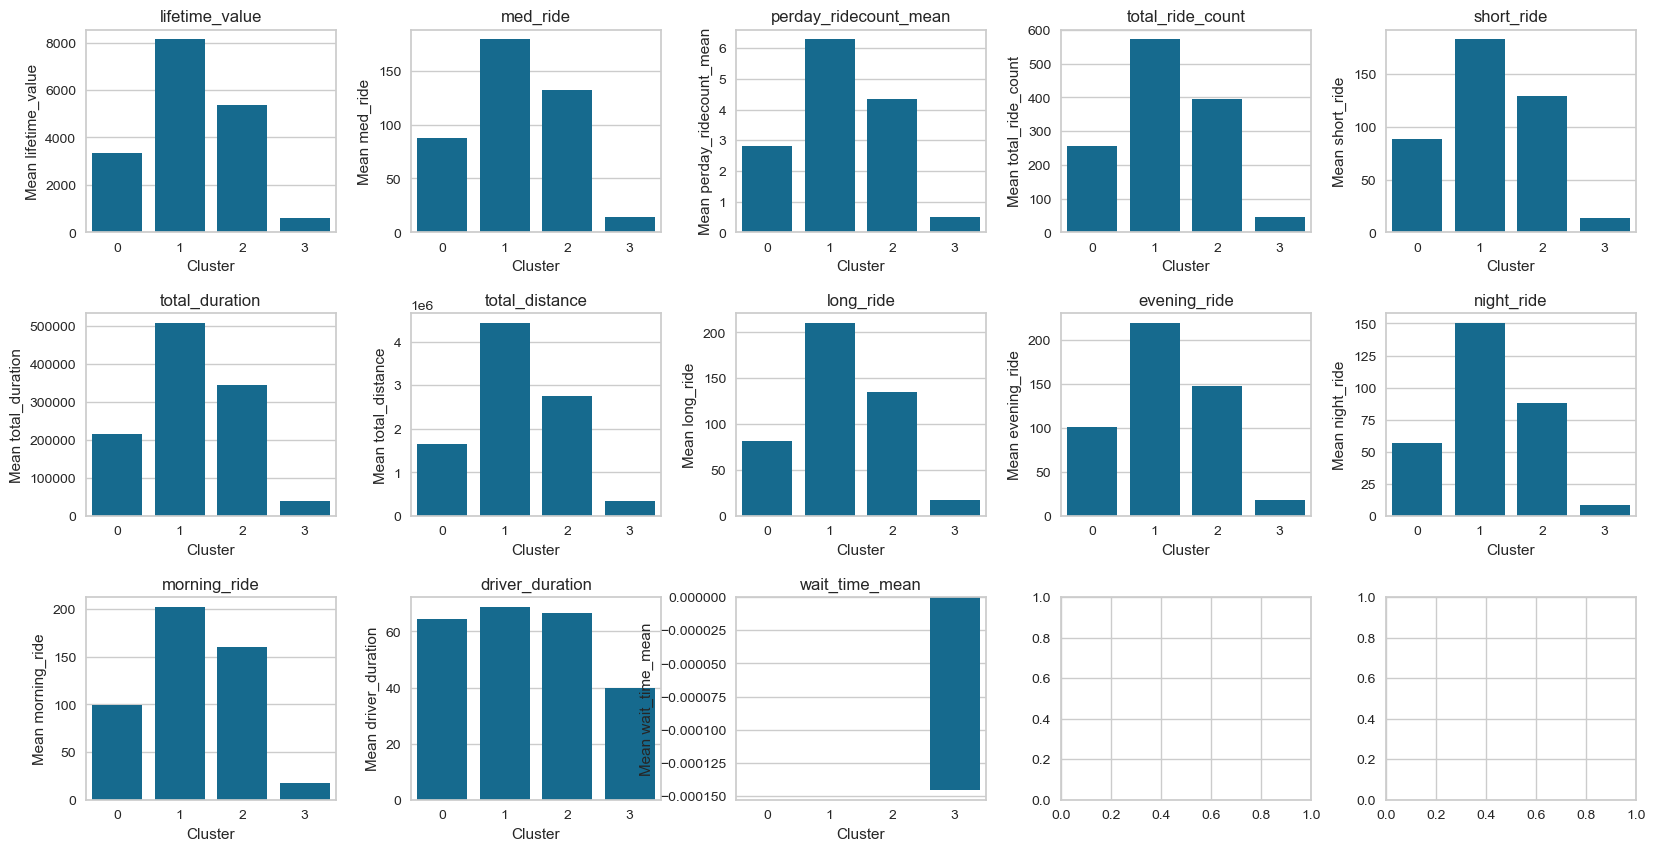

In [252]:
# create subplots for each column in the grouped dataframe
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# loop through each column in the grouped dataframe and plot it in a subplot
for i, column in enumerate(grouped_df.columns):
    sns.barplot(x=grouped_df.index, y=grouped_df[column], ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(column)
    axes[i//5, i%5].set_xlabel('Cluster')
    axes[i//5, i%5].set_ylabel('Mean ' + column)

plt.show()

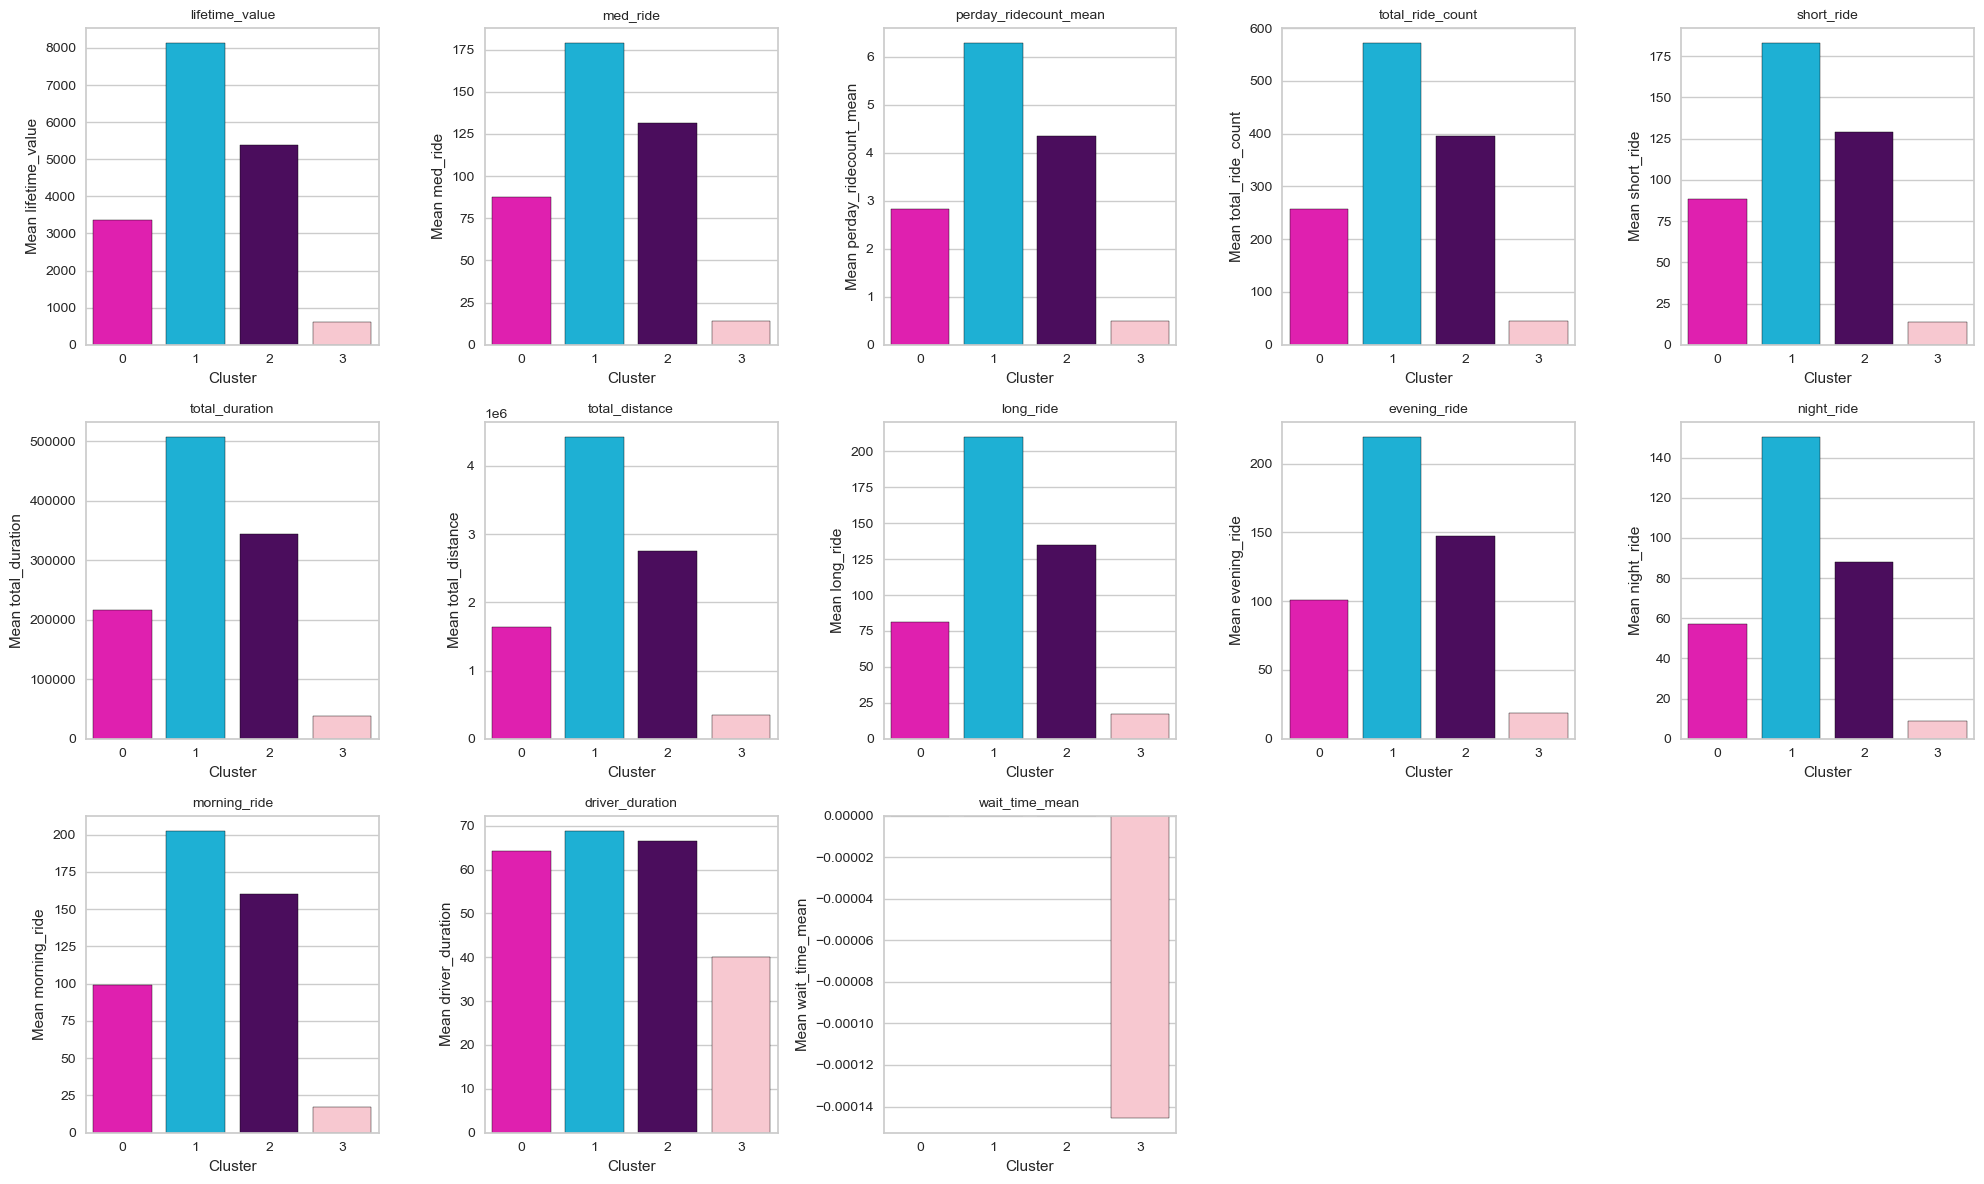

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()


for i, column in enumerate(grouped_df.columns):
    sns.barplot(x=grouped_df.index,
                y=grouped_df[column],
                ax=axes[i],
                palette= ['#FF00BF', '#00C2F2', '#52006A', '#FFC0CB'],
               edgecolor='black')  

    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Mean ' + column)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Cluster 1 is Excellent drivers: This cluster has drivers with the highest total lifetime value, ride count, and total duration and distance. These drivers are likely the most in demand and have a good reputation for providing excellent service to their customers, leading to high earnings.

Cluster 3 is Bad drivers: This cluster has drivers with relatively low total lifetime value, low total ride count, and low total duration and distance. They may have issues with customer service, low demand for their services, or low fares.

Cluster 0 is Fair drivers: This cluster has drivers with moderate total lifetime value, ride count, duration, and distance. They may not have a high demand for their services, but they also do not have any major issues that impact their earnings.

Cluster 2 is Good drivers: This cluster has drivers with higher total lifetime value, higher ride count, and higher total duration and distance than the first two clusters. They may have a consistent demand for their services and a good reputation, leading to higher earnings.

### Actionable Recommendations